In [5]:
import os
import pandas as pd
import numpy as np


In [6]:
path = '.\\telecom_churn.csv'
data = pd.read_csv(path, sep=',')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# 뒤쪽도 확인
data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [9]:
# 불러들인 데이터의 모양 체크
data.shape

(3333, 20)

In [10]:
# 샘플 수 == data.shape[0]
len(data)

3333

In [11]:
# 컬럼 수 == data.shape[1]
len(data.columns)

20

In [12]:
# index를 체크해보자
data.index

RangeIndex(start=0, stop=3333, step=1)

In [13]:
# 컬럼에 해당하는 인덱스가 어디 있는지 확인
data.columns.get_loc("Voice mail plan")

4

In [14]:
# 여러 컬럼 인덱스 한 번에 확인하기
cols = ["Area code", "Customer service calls","Churn"]
idx  = [data.columns.get_loc(col) for col in cols]
idx

[2, 18, 19]

In [ ]:
# 참고) 1개 컬럼에 대한 접근 방식!!!!!
# -- 비공식 --
#data["Churn"]
#data.Churn # --> 컬럼명에 공백이 있으면 상용하기 애매함...

# -- 공식 --
# 1개 값(at,iat) vs 여러개 값(loc, iloc)
# ==> 기준에 대한 통일 : 정수 or  내가 만든 것!!!!!
#data.loc[:, "Churn"]
#data.iloc[:, 19]
#data.iloc[:, data.columns.get_loc("Churn")]
#data.iloc[:, -1]

In [16]:
# Q) 컬럼의 타입을 변경 : Churn 컬럼(T/F) ---> 숫자로 변경!!!

# 1) numpy의 벡터 연산을 적용!!!! --> 모든 원소에 일괄적용!!!
#    ==> 기능 중심으로 코드 작성이 용이 함!!
#        data["new"] = data["col1"] + data["col2"]
data.loc[:,"Churn"] = data.loc[:,"Churn"].astype("int64")
data.loc[:,"Churn"]

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [15]:
# 2) apply + lambda
# --> 기존에는 lambda 함수에는 어찌할 지만 작성!!!!
# --> 차이점 : if문을 lambda 함수에 작성을 해야함!!!!
#              lamnda 함수에 if문은 2분법적으로 활용!!!!if~else
#            lambda x :  T값  if 조건 else F값
#      조건이 3개 이상  lambda x :  T값  if 조건 else ( T값 if 조건2 else F값)
# ==> 보통은 3개정도까지는 할 수 있지만,,,,그 이상은 복잡해서..굳이..
# ==> 조건이 많거나,,조건 처리에 코드가 길어지면 보통은 함수로 만들어서 처리!!!
data.loc[:,"Churn"].apply(lambda x: 1 if x == True else 0 )

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [ ]:
# 3) dict + replace
# 4) 내가 그냥 FM적인 함수를 만들어서 apply
# etc

In [17]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [18]:
# --> 수치형 컬럼이 아니라 범주형 컬럼들에 대해서는
#     include에다가 타입을 지정을 할 수 있음!!!!
# ==> value_counts
data.describe(include=["object","bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [20]:
# Q) 어떤 값이 몇 개가 있는지 체크!!! value_counts()
data["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [21]:
# + 비율로 볼 때
data["Churn"].value_counts() / len(data)

Churn
0    0.855086
1    0.144914
Name: count, dtype: float64

In [22]:
data["Churn"].value_counts(normalize=True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [23]:
# Q) 주어진 데이터를 내가 원하는 기준대로 정렬해서 보자!!!
#    ==> Total day charge 값을 기준으로 정렬해서 보자!!!
# + sort_values(내부값) vs sort_index(가로/세로의 인덱스명을:틀)
# + 오름/내림 : ascending=T/F
data.sort_values( by=["Total day charge"])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1345,SD,98,415,No,No,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1


In [24]:
# Q) Churn은 이탈 여부에 대해서
#     낮 시간에 대한 요금과 관련이 있을까???
# ==> Churn의 컬럼의 값을 기준으로 정렬
#      + Total day charge를 기준으로 정렬!!!!!
# ==> Churn : 오름차순,
#     Total day charge : 내림차순
# ++ sort/sorted(+/-)  vs ascending= [T/F , T/F]

data.sort_values( by = ["Churn", "Total day charge"],
                 ascending=[True, False])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,NH,117,510,Yes,No,0,54.2,100,9.21,303.2,84,25.77,171.8,84,7.73,8.6,2,2.32,1,1
2173,KS,47,510,Yes,No,0,47.8,120,8.13,178.9,123,15.21,152.6,96,6.87,13.3,7,3.59,0,1
2158,FL,166,510,Yes,No,0,47.7,89,8.11,264.4,95,22.47,235.2,97,10.58,13.2,3,3.56,0,1
1531,DE,138,510,Yes,No,0,46.5,104,7.91,186.0,114,15.81,167.5,95,7.54,9.6,4,2.59,4,1


In [25]:
# Q) 특정 조건에 맞는 데이터를 추려서 볼 때
#    ==> 필터링 : 불리언 인덱싱!!!
# Churn =0 ( 이탈하지 않은 고객들을 대상으로)
# 잘 사용하는 고객들 중에서 국제 계획이 없는 분을 대상으로!!
# (International Plan = No, Yes)
# ==> (유지고객&국제계획무--> 전체 국제 통화 시간 최고값)

data.loc[(data["Churn"]==0 ) & (data["International plan"] =="No"), "Total intl charge"]

0       2.70
1       3.70
2       3.29
6       2.03
8       2.35
        ... 
3327    3.19
3328    2.67
3329    2.59
3330    3.81
3332    3.70
Name: Total intl charge, Length: 2664, dtype: float64

In [27]:
# Q) State에 값이 너무 많이 있어요....
#    ==> 기존의 값을 재조정을 하고 싶어요!!!!!!!
#    ==> 간단하게 주의 코드의 앞 대문자만 가지고 정리를 하겠다!!!
#    ex) WV --> W, NY --> N etc
# ===> W로 재조정된 값들만 보자!! 필터링!!!!!
# +++ apply + lambda
data["State"].value_counts()

# 컬럼을 만드는 방법
data["f-code"]=data["State"].apply(lambda x: x[0])
data[data["f-code"]=="W"]
# ===> FM으로는 안 쓰고, 간략하게 작성을 한 케이스임!!!!


# 컬럼을 만들지 않고 변경한 값 바로
data[data.loc[:,"State"].apply(lambda x: x[0]) == "W"]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,f-code
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,18.87,326.4,97,14.69,11.2,5,3.02,0,0,W
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,...,16.24,182.7,115,8.22,9.5,3,2.57,0,0,W
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,...,19.19,265.3,86,11.94,3.5,3,0.95,1,0,W
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,...,18.46,70.6,79,3.18,11.0,3,2.97,1,0,W
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,...,18.67,203.9,127,9.18,9.7,3,2.62,5,1,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,No,No,0,238.0,97,40.46,164.5,...,13.98,282.5,132,12.71,10.6,6,2.86,2,0,W
3303,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,13.23,247.6,94,11.14,11.5,7,3.11,2,0,W
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,...,17.84,280.9,112,12.64,15.9,6,4.29,3,0,W
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,16.80,193.7,82,8.72,11.6,4,3.13,1,0,W


In [28]:
# 기존 값 < -- > 변경하고자는 값 쌍
d = { "No": False, 'Yes':True}
# --> replace도 기존의 값을 변경하는 것이기 때문에
#     inplace = T/F
data.replace({"International plan":d })

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,f-code
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,K
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,O
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,N
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,O
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,False,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0,A
3329,WV,68,415,False,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0,W
3330,RI,28,510,False,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0,R
3331,CT,184,510,True,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0,C


<Axes: xlabel='Total intl calls'>

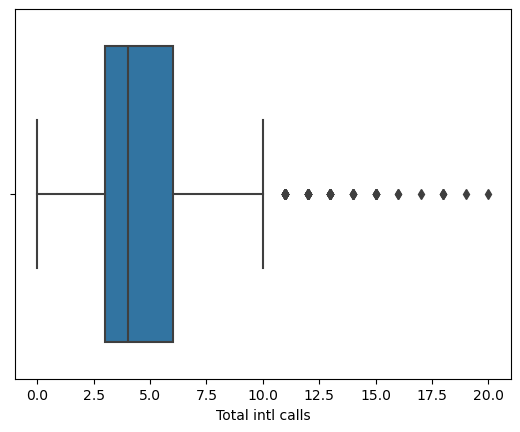

In [29]:
import seaborn as sns

sns.boxplot(data = data, x="Total intl calls")

<Axes: ylabel='Total intl calls'>

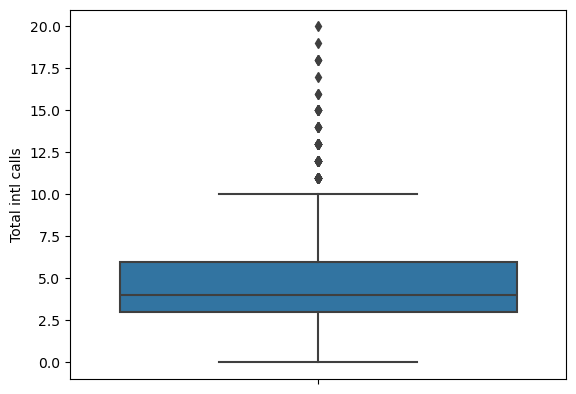

In [30]:
sns.boxplot(data = data, y="Total intl calls")

<Axes: ylabel='Total intl calls'>

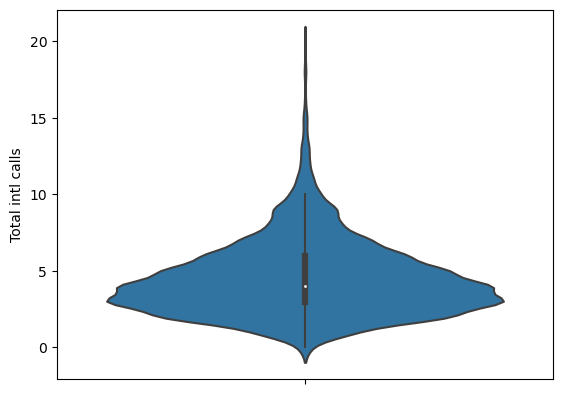

In [31]:
sns.violinplot(data = data, y="Total intl calls")

<Axes: ylabel='Total intl calls'>

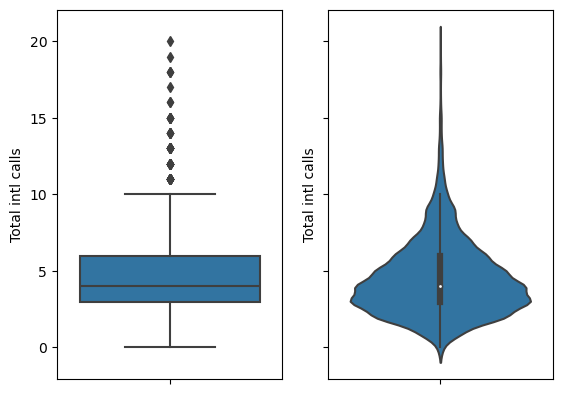

In [37]:
import matplotlib.pyplot as plt
fig, axes= plt.subplots( nrows=1, ncols=2, sharey=True)


sns.boxplot(data = data, y="Total intl calls", ax=axes[0])
sns.violinplot(data = data, y="Total intl calls", ax=axes[1])